In [2]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import thinkdsp

Populating the interactive namespace from numpy and matplotlib


## Index
* [Basics](#basics)
    * [thinkdsp has bugs in calculating frequency resolution and coordinates](#thinkdsp_bug)
* [Frequency Resolution](#freq_resolution)
    * [sample length affects frequency resolution](#sample_length)

<a id="basics"></a>
### Basics

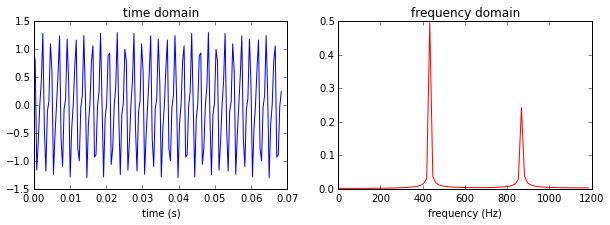

In [3]:
# ------------- make the signal
cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)
mix_sig = sin_sig + cos_sig # operators have been overriden on signal object to do math

# ------------- sample to generate time-domain wave
sample_freq = 2400
wave = mix_sig.make_wave(duration=mix_sig.period*30,start=0,framerate=sample_freq)
N = len(wave.ys)

# ------------- DFT to get frequency domain spectrum
spectrum = wave.make_spectrum()

# ------------- plot
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(wave.ts,wave.ys)
plt.xlabel("time (s)")
plt.title("time domain")

plt.subplot(1,2,2)
plt.plot(spectrum.fs,spectrum.amps/N,"r")
plt.xlabel("frequency (Hz)")
plt.title("frequency domain")

<a id="thinkdsp_bug"></a>
#### thinkdsp has bugs in calculating frequency resolution and coordinates
<span style="color:red;font-weight:bold;font-size:1.2em;font-style:italic">we should use "np.fft.rfftfreq" instead</span>

In [4]:
sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sample_freq = 1600
wave = sig.make_wave(duration=5*sig.period, start=0, framerate=sample_freq)
print "wave has %d points"%(len(wave.ys))

spectrum = wave.make_spectrum()

# !!! thinkdsp's frequency resolution is different from theory
print "thinkdsp's frequency resolution: %3.3f"%(spectrum.freq_res)
print "theoritical frequency resolution: %3.3f"%(sample_freq/len(wave.ys))

wave has 19 points
thinkdsp's frequency resolution: 88.889
theoritical frequency resolution: 84.000


<a id="freq_resolution"></a>
### Frequency Resolution
time resolution is easy to understand. in STFT, we take a segment and do DFT on that segment, so we cannot know the difference inside that sigment. so longer the segment, poor time resolution. but how to understand frequency resolution?

from the "coordinate transformation" perspective to understand DFT, the frequency component measures "closeness" to each axis, and each axis represents a frequency. if we plot amplitude against frequencies, and <span style="color:red">we see a peak at "f", we can conclude the fundamental frequency is closer to "f" than its left "f-resolution" and its right "f+resolution".</span>

<span style="color:darkorange;font-weight:bold;font-style:italic">but within that "resolution", maybe there will be another frequency can be much closer to the fundamental frequency of the signal</span>, but we cannot know. the frequency resolution only tells us, the signal is closer to "f", than f-resolution and f+resolution, but doesn't tell us anything about within that resolution (e.g. is there any closer frequency?)

<a id="sample_length"></a>
#### sample length affects frequency resolution

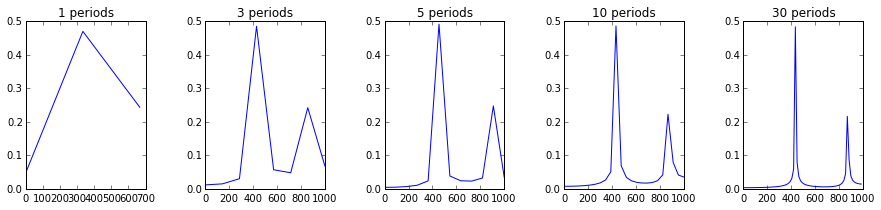

In [5]:
cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)
mix_sig = sin_sig + cos_sig # operators have been overriden on signal object to do math

sample_freq = 2000
num_periods = [1,3,5,10,30]

plt.figure(figsize=(15,3))
for index,num_period in enumerate(num_periods):
    wave = mix_sig.make_wave(start=0,duration=num_period*mix_sig.period,framerate=sample_freq)    
    spectrum = wave.make_spectrum()
    
    plt.subplot(1,len(num_periods),index+1)
    plt.plot(spectrum.fs,spectrum.amps/len(wave.ys))
    plt.title("%d periods"%num_period)
plt.subplots_adjust(wspace=0.5)